### Objective:

Explore the dataset and extract insights from the data, perform the statistical analysis to answer the following questions:

* Explore the dataset and extract insights using Exploratory Data Analysis.
* Do the users spend more time on the new landing page than the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for    the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language? 
* Is the mean time spent on the new page same for the different language users?

### Problem definition:

perform exploratory data analysis to find patterns and extract insights to help company decide whether the new landing page is more effective to gather new subscribers than the old page.
we need to perfrom statistical business analysis to test the data components and find the relationships between it's variable to give set of recommendations to the management in order to help them in decision making.

### Data background and contents

let's start by checking data data contents , variables types, size of Dataframe, checking if there are any null or duplicated values.

In [79]:
#Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as stats
%matplotlib inline
sns.set(color_codes=True) # adds a nice background to the graphs
warnings.filterwarnings('ignore')

In [6]:
#import csv dataset file
data= pd.read_csv(r'C:\Users\lostsemsem\Desktop\p2\abtest-1.csv')

In [7]:
# copying data to another varaible to avoid any changes to original data
df=data.copy()

In [9]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,yes,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [11]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [12]:
#get the size of dataframe
df.shape

(100, 6)

In [14]:
#Are there any missing values?
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [15]:
#Are there any duplicate values?
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [17]:
# changing objects to categories
df["group"]=df["group"].astype("category")
df["landing_page"]=df["landing_page"].astype("category")
df["converted"]=df["converted"].astype("category")
df["language_preferred"]=df["language_preferred"].astype("category")
df["user_id"]=df["user_id"].astype("category")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    category
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(5), float64(1)
memory usage: 7.6 KB


In [19]:
# Give a statistical summary for the dataset.
df.describe()

,time_spent_on_the_page
count,100.000000
mean,5.377800
std,2.378166
min,0.190000
25%,3.880000
50%,5.415000
75%,7.022500
max,10.710000


observations:
* the mean time spent on both of the landing pages is 5.38 with standard deviation 2.38 
* the median time is 5.42 while 50 % of the users falls between 3.88 and 7.02
* the least time spent on both of the landing pages is 0.19 while the maximum time spent is 10.071

In [21]:
#describe the categorical variables
df.describe(include=["category"])

,user_id,group,landing_page,converted,language_preferred
count,100,100,100,100,100
unique,100,2,2,2,3
top,546592,treatment,old,yes,Spanish
freq,1,50,50,55,34


observations:
* there are two groups of users defined as control and treatment groups which refer to the new and the old landing page visitor.
* there are three preferred languages.
* control group represent the old landing page users with count of 50 values.
* treatment group represent the new landing page users with count of 55 values 

### EDA : Univariate analysis

In [23]:
#cheking counts for each group 
df.group.value_counts()

treatment    50
control      50
Name: group, dtype: int64

In [27]:
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

In [28]:
#cheking the counts for converted and nonconverted users
df.converted.value_counts()

yes    55
no     45
Name: converted, dtype: int64

observations:
* the dataframe consists of 50 users of the new landing page and 50 of the old page.
* there are 55 of the customers converted and 45 are not converted.
* there are 34 of users preferred to chose spansih language and 34 who chose French while the users who chose English as the language preferred are 32.

In [29]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### let's visualize the time spent on both landing page

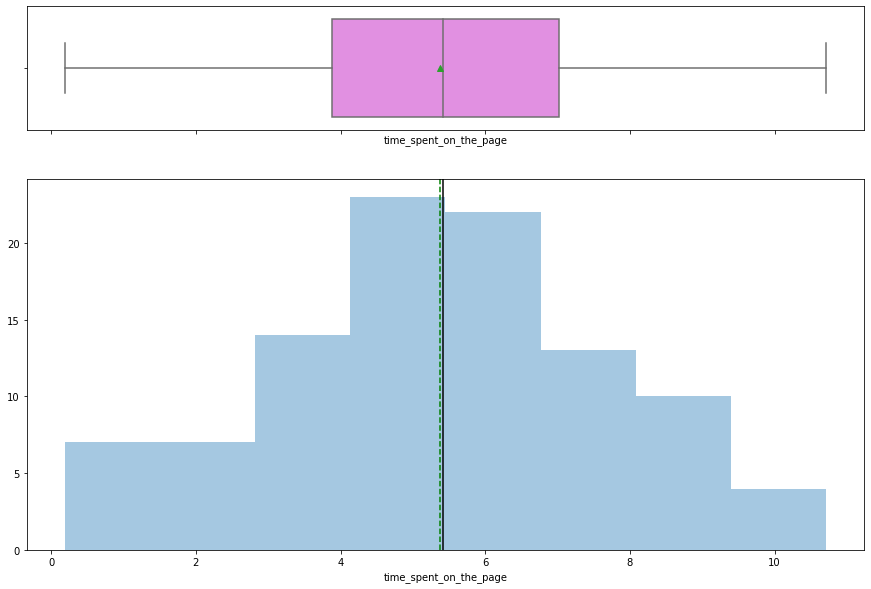

In [30]:
histogram_boxplot(df["time_spent_on_the_page"])

observation:
* time spent on both pages is almost symmertic and distributed around the mean.
* there are no outliers for this variable.
* From boxplot we can see that the third quartile(Q3) is almost 7 which means 75% of users are spending less than 7 minutes on the landing page

In [32]:
# describe the time spent by each lanuage user
df[df['language_preferred'] == 'Spanish'].describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,34.0,5.331765,1.818095,0.19,4.475,5.605,6.515,8.72


observation:
* the mean time spent by people who chose spanish languge is 5.33 with standard deviation 1.82. 
* the min time spent by people who chose spanish languge is 0.19 and the max is 7.72.
* 75% of users who chose spanish languge spend less than 6.515 on the website.

In [33]:
df[df['language_preferred'] == 'French'].describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,34.0,5.253235,2.675413,0.4,3.395,5.315,7.3675,10.71


observation:
* the mean time spent by people who chose french languge is 5.25 with standard deviation 1.82. 
* the min time spent by people who chose spanish languge is 0.4 and the max is 10.71.
* 75% of users who chose spanish languge spend less than 7.37 minutes on the website.

In [34]:
df[df['language_preferred'] == 'English'].describe().T

,count,mean,std,min,25%,50%,75%,max
time_spent_on_the_page,32.0,5.559063,2.621079,0.22,3.6175,5.755,7.1375,10.5


observation:
* the mean time spent by people who chose french languge is 5.56 with standard deviation 1.82. 
* the min time spent by people who chose spanish languge is 0.22 and the max is 10.5.
* 75% of users who chose spanish languge spend less than 7.14 minutes on the website.

In [36]:
def dist_box_violin(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig, axes =plt.subplots(1,3,figsize=(17, 7))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.distplot(data,kde=False,color='Blue',ax=axes[0])
    axes[0].axvline(data.mean(), color='y', linestyle='--',linewidth=2)
    axes[0].axvline(data.median(), color='r', linestyle='dashed', linewidth=2)
    axes[0].axvline(data.mode()[0],color='g',linestyle='solid',linewidth=2)
    axes[0].legend({'Mean':data.mean(),'Median':data.median(),'Mode':data.mode()})
    sns.boxplot(x=data,showmeans=True, orient='h',color="purple",ax=axes[1])
    #just exploring violin plot
    sns.violinplot(data,ax=axes[2],showmeans=True)

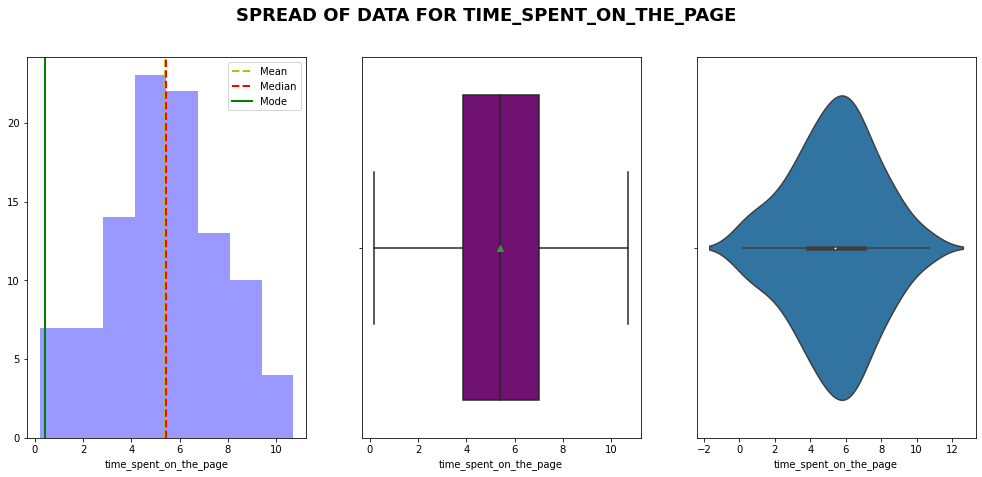

In [37]:
dist_box_violin(df.time_spent_on_the_page)

observations:
* the data distribution is almost syymetric with bell curve shape.
* the mean and the median are almost the same.
* the most frequented time spent by users (mode) is less than 1 minute.


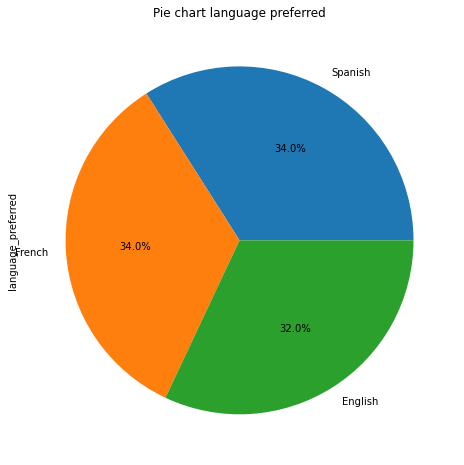

In [38]:
plt.figure(figsize=(14,7))
df['language_preferred'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(8,8))
plt.title("Pie chart language preferred")
plt.show()

In [39]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage
    

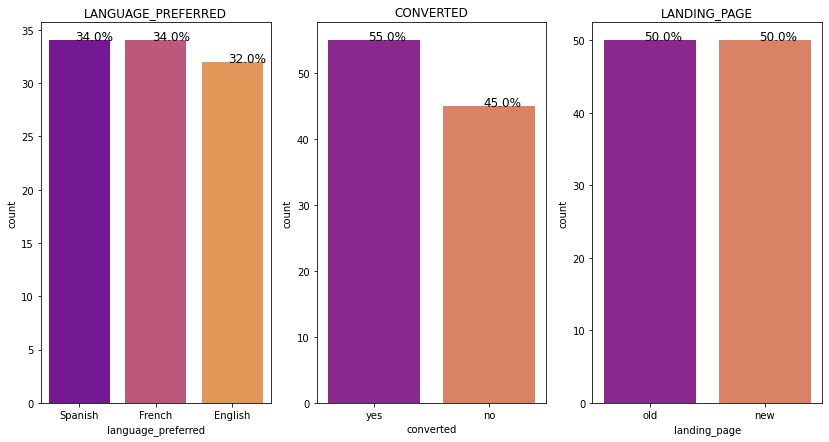

In [50]:
fig1, axes1 =plt.subplots(1,3,figsize=(14, 7))
list_col=['language_preferred','converted','landing_page',]
j=0
for i in range(len(list_col)):
    order = df[list_col[i]].value_counts(ascending=False).index # to display bar in ascending order
    axis=sns.countplot(x=list_col[i], data=df , order=order,ax=axes1[i],palette='plasma').set(title=list_col[i].upper() )
    bar_perc(axes1[i],df[list_col[i]])

insghts:
* customers are almost equal in count based on three different language preferred.
* 55% of our visitors are converted

### Bivariate analysis

#### Time spent per converted group 

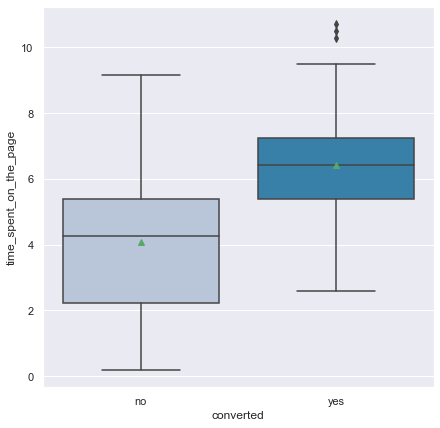

In [129]:
plt.figure(figsize=(7,7))
sns.boxplot(df["converted"],df["time_spent_on_the_page"],showmeans=True,palette="PuBu")
plt.show()

observations:
* there are some outilers in time spent while the user converted.
* customers who are converted are spending more time than users who are not.

#### Time spent by different language users 

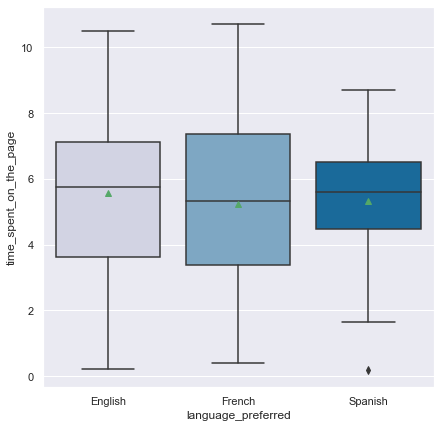

In [130]:
plt.figure(figsize=(7,7))
sns.boxplot(df["language_preferred"],df["time_spent_on_the_page"],showmeans=True,palette="PuBu")
plt.show()

observations:
* customers who chose french language are spending more time than the other language users.
* customers who chose spanish language are spending less time comparing to the other languge users.

#### Time spent on each landing page

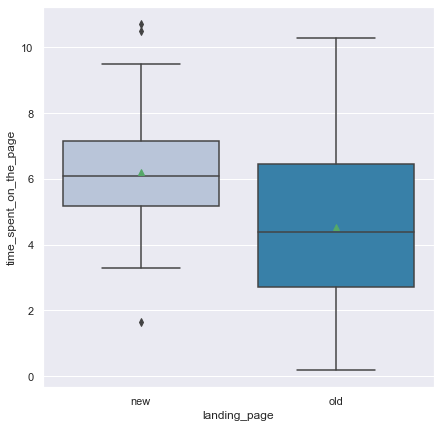

In [131]:
plt.figure(figsize=(7,7))
sns.boxplot(df["landing_page"],df["time_spent_on_the_page"],showmeans=True,palette="PuBu")
plt.show()

observation:
* customers who used the new landing page spends more time than the old landing page users
* there are some outliers for the time spent by customers on the new landing page 

#### Converted status for each landing page

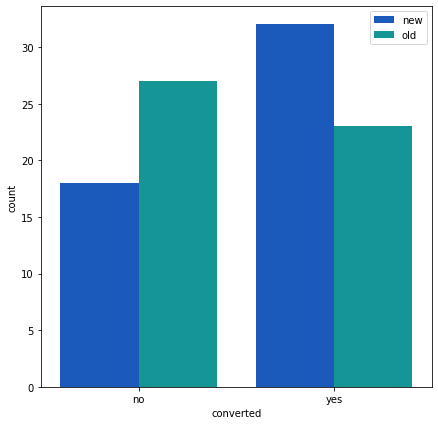

In [60]:
plt.figure(figsize=(7,7))
sns.countplot(df["converted"],hue=df["landing_page"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

observation:
* the new landing page has higher conversion rate comparing to the old landing page 

#### Converted status for different languge users 

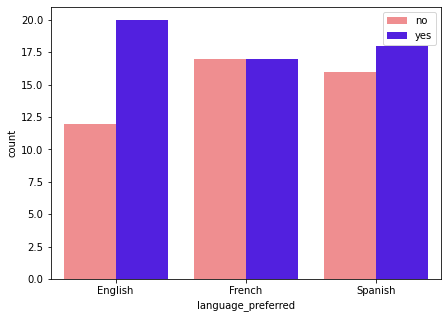

In [69]:
plt.figure(figsize=(7,5))
sns.countplot(df["language_preferred"],hue=df["converted"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

observation:
* people who chose english language has higher conversion rate comparing to people who chose another languages 

#### Time spent for each landing page vs converted status

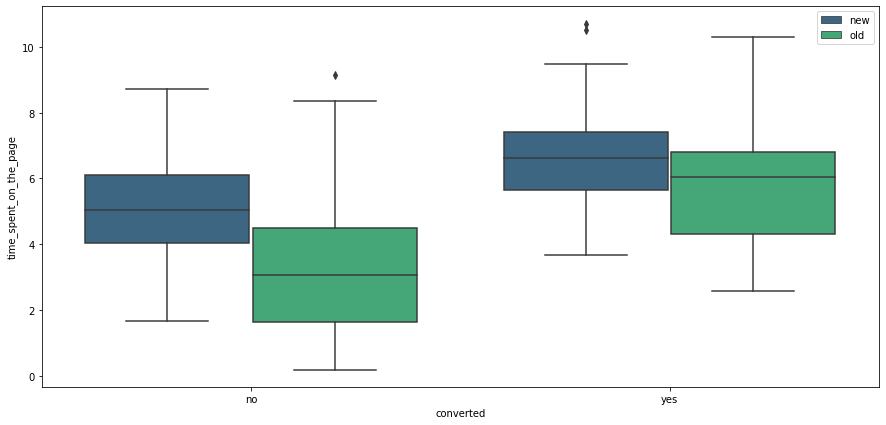

In [71]:
plt.figure(figsize=(15,7))
sns.boxplot(df["converted"],df["time_spent_on_the_page"],hue=df["landing_page"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

observation:
* time spent on the new landing page is higher than time spent on the old landing page for both conversion status.

#### Time spent on each landing page for different language users

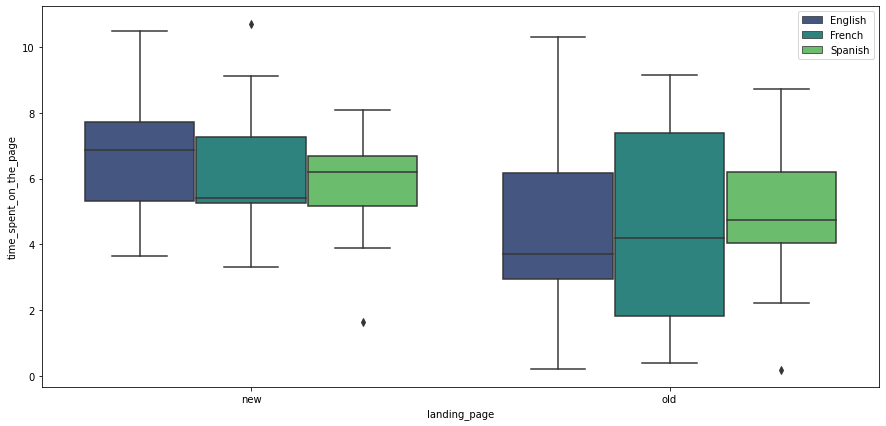

In [73]:
plt.figure(figsize=(15,7))
sns.boxplot(df["landing_page"],df["time_spent_on_the_page"],hue=df["language_preferred"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

observation:
* time spent on the new page are higher for all language users except the french language as customers who chose rench language spend more time on the old landing page than the new page.

## Question 2

Do the users spend more time on the new landing page than the existing landing page?

In [132]:
#subset the data to create our two samples
new_page = df.query('landing_page == "new"')['time_spent_on_the_page']
old_page = df.query('landing_page == "old"')['time_spent_on_the_page']

In [76]:
# find the sample means and sample standard deviations for the two samples
df.groupby('landing_page').describe()

time_spent_on_the_page                                        \
                              count    mean       std   min    25%    50%   
landing_page                                                                
new                            50.0  6.2232  1.817031  1.65  5.175  6.105   
old                            50.0  4.5324  2.581975  0.19  2.720  4.380   

                             
                 75%    max  
landing_page                 
new           7.1600  10.71  
old           6.4425  10.30

#### Insights
* the mean spent time on the new landing page is 6.2232
* the mean spent time on the old landing page is 4.5324
* the standard deviation of spent time on the new landing page is 1.8170
* the standard deviation of spent time on the new landing page is 2.5819

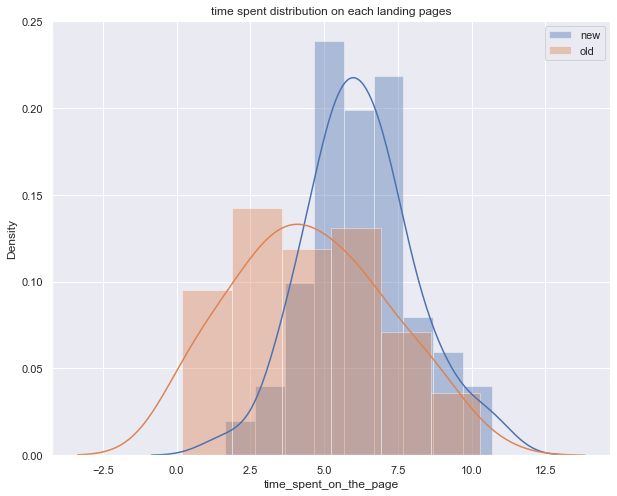

In [124]:
#visualize time spent distribution on each landing page 
f, ax = plt.subplots(figsize=(10,8))
sns.distplot(df[df.landing_page == 'new'].time_spent_on_the_page, ax=ax, label='new')
sns.distplot(df[df.landing_page == 'old'].time_spent_on_the_page, ax=ax, label='old')
plt.title('time spent distribution on each landing pages')
plt.legend()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64


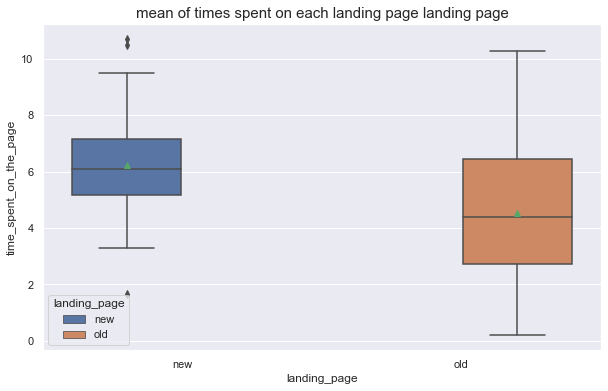

In [125]:
#let's find the mean time spent on each landing page 
print(df.groupby("landing_page")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,6))
a = sns.boxplot(x= "landing_page", y = 'time_spent_on_the_page' , showmeans=True,data = df, hue = 'landing_page')
a.set_title("mean of times spent on each landing page landing page", fontsize=15)
plt.show()

#### Shapiro test to check the distribution of the data for each sample

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time spent on the new landing page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time spent on the new landing page doen't follow a normal distribution

In [84]:
stats.shapiro(new_page)

ShapiroResult(statistic=0.9857664704322815, pvalue=0.8040016293525696)

In [85]:
stats.shapiro(old_page)

ShapiroResult(statistic=0.9776089191436768, pvalue=0.45611920952796936)

#### Insight
In the code chunk above, we performed the Shapiro-Wliks test on both Pandas series (i.e., for each group seperately). Consequently, we get a tuple, for each time we use the shapiro method. This tuple contains the test statistics and the p-value. Here, the null hypothesis is that the data follows a normal distribution. Thus, we can infer that the data from both groups is normally distributed.

### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the time spent on the page s is measured on a continuous scale.
* Normally distributed populations - we have tested the samples usning shapiro test.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

We can use two sample T-test for this problem.

### Let's write the null and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean time spent on the new landing page and the mean time spent on the old landing page respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### <a name='link8'>**Two Independent Sample T-test for Equality of Means - Uenqual Std Dev**</a>
### Let's find the p-value

In [86]:
# import the required fuction
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(new_page, old_page, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


#### Insight
As the p-value (~0.0001) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that users spend more time on the new landing page than the existing landing page

### Question 3
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### let's find the conversion rate for each landing page

In [90]:
#crosstab to count the number of conversions per each landing page
conv_page=pd.crosstab(df['converted'],df['landing_page'] )
print(conv_page)

landing_page  new  old
converted             
no             18   27
yes            32   23


##### insight
* 32 out of 50 who visited the new landing page are converted.
* 23 out of 50 who visited the old landing page are converted.

[Text(0.5, 1.0, 'conversion per landing page')]

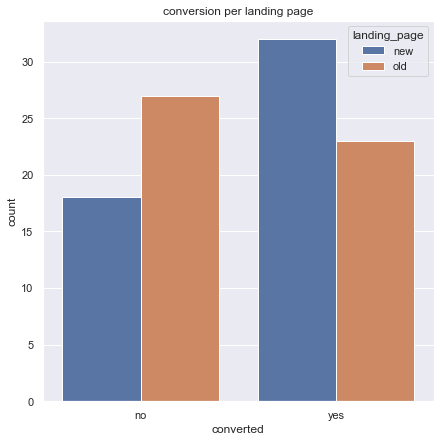

In [117]:
#show the convertion status for each landing 
plt.figure(figsize=(7,7))
sns.countplot(df['converted'],hue=df["landing_page"]).set(title='conversion per landing page')

insights:
* the new landing page has higher conversion rate comparing to the existing landing page.


### Let's write the null and alternative hypothesis
Let $p_1,p_2$ be the proportions of users who visited the new landing page and the old landing page and got converted respectively

we should test the null hypothesis

>$H_0:p_1 =p_2$ where the two proportions are equal

Against the alternate hypothesis

>$H_a:p_1 > p_2$ where the first proportion is greater than the second proportion

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a user is either converted or not converted.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 
>$np_1 = 50\cdot \frac{32}{50} =32 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-32}{40} =18 \geq 10 \\
np_2 = 50\cdot \frac{23}{50} =23 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-23}{50} =27 \geq 10 $


### <a name='link11'>**Two Proportion Z-test**</a>
#### Let's find the p-value

In [92]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest 

# set the counts of converted users 
converted = np.array([32, 23])

# set the sample size 
mysample= np.array([50,50])

test_stat, p_value = proportions_ztest(converted, mysample, value = 0, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.035220214636043995


#### Insight

As the p-value is less than the significance level 0.05, we can reject the null hypothesis. Thus, we have enough statistical evidence to conclude that the conversion rate for the new page is higher than the conversion rate of the old page. 

## Question 4
Does the converted status depend on the preferred language?

### <a name='link14'>**Chi-Square Test for Independence**</a>

### Let's write the null and alternative hypothesis


We will test the null hypothesis

>$H_0:$ converted status is independent of the preferred language.

against the alternate hypothesis

>$H_a:$ converted status depends on preferred language.

### Let's test whether the assumptions are satisfied or not

* Categorical variables - Yes language preferred and converted status are categorical variables.
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [94]:
#crcrosstab as a contingency table 
conv_lang=pd.crosstab(df['converted'],df['language_preferred'])
conv_lang

language_preferred,English,French,Spanish
converted,,,
no,12,17,16
yes,20,17,18


<AxesSubplot:xlabel='converted'>

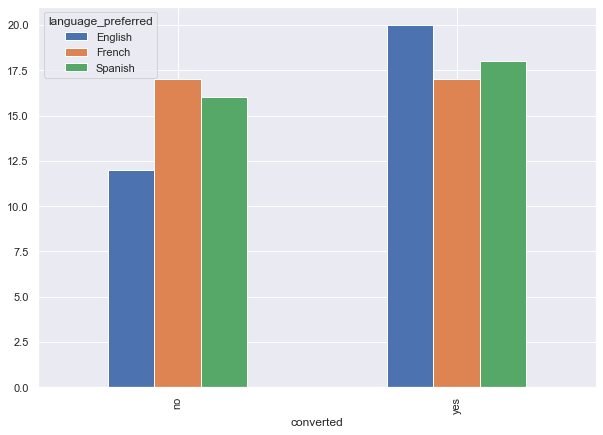

In [119]:
#show the number of converted status and non converted status for each language preferred
conv_lang.plot(kind='bar',figsize=(10,7))

### Let's find the p-value

In [95]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(conv_lang)
print('The p-value is', p_value)

The p-value is 0.5686624745121615


### Insight
As the p-value is much higher than the significance level 0.05, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that coverted status depends on the preferred language.

## Question 5
Is the mean time spent on the new page same for the different language users?

In [98]:
#creating two new dataframes for users of new landing page and users of the existing landing page  
new_page_group= df[(df['landing_page']=="new")] # dataframe for only users of new page
old_page_group= df[(df['landing_page']=="old")] # dataframe for only users of old page

In [99]:
#count the number of users per each language for the new landing page
new_page_group.language_preferred.value_counts()

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64

In [100]:
#find discriptive statistics for time spent on the new landing page by different language users
new_page_group.groupby('language_preferred').agg({'time_spent_on_the_page': ['mean', 'min','std','max']})

time_spent_on_the_page                       
                                     mean   min       std    max
language_preferred                                              
English                          6.663750  3.65  1.984150  10.50
French                           6.196471  3.30  1.933394  10.71
Spanish                          5.835294  1.65  1.525656   8.08

observations:
* the mean time spent on the new page while the language preferred is Spansih is 5.8352
* the mean time spent on the new page while the language preferred is French is 6.1964
* the mean time spent on the new page while the language preferred is English is 6.6637

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


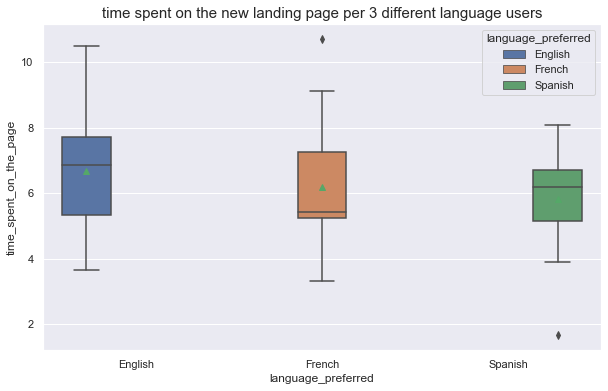

In [104]:
#let's find the mean time spent on the new page for different language users 
print(new_page_group.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , showmeans=True,data = new_page_group, hue = 'language_preferred')
a.set_title("time spent on the new landing page per 3 different language users", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of varaince, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ time spent on the new page follows a normal distribution against

against the alternative hypothesis

>$H_a:$ time spent on the new page does not follow a normal distribution

In [105]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(new_page_group['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the res

In [107]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( new_page_group['time_spent_on_the_page'][new_page_group['language_preferred']=="English"], 
                                   new_page_group['time_spent_on_the_page'][new_page_group['language_preferred']=="French"], 
                                   new_page_group['time_spent_on_the_page'][new_page_group['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Let's write the null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page by different language users Spanish, French and English respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the means of time spent by different language users on the new landing is different.

### Let's find the p-value

In [110]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(new_page_group.loc[new_page_group['language_preferred'] == 'English',
'time_spent_on_the_page'],
new_page_group.loc[new_page_group['language_preferred'] == 'French', 'time_spent_on_the_page'],
new_page_group.loc[new_page_group['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Insight
As the p-value is much higher than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that  at least one of the means of time spent by different language users on the new landing page is different.